In [22]:
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [23]:
# Reading data
mnist = fetch_mldata('MNIST original')

In [24]:
# Assigning variables to data
X, y = mnist["data"], mnist["target"]

In [25]:
# Splitting dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [26]:
# Shuffling dataset 
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [27]:
# Fitting KNN classifier to training dataset
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=10)
KNN_clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='distance')

In [28]:
# Computing Cross_val_score for 3-fold
cross_val_score(KNN_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.96690662,  0.96539827,  0.9679952 ])

In [29]:
# Scaling the data using Standard Scalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [30]:
# Computing Cross_val_score after scaling
cross_val_score(KNN_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.93756249,  0.93884694,  0.94204131])

In [31]:
# Prediction using training data
y_train_pred = cross_val_predict(KNN_clf, X_train_scaled, y_train, cv=3)
y_train_pred

array([ 0.,  4.,  0., ...,  0.,  0.,  9.])

In [32]:
# Performance Evaluation - Confusion Matrix
confusion_matrix = confusion_matrix(y_train, y_train_pred)
confusion_matrix

array([[5826,    6,   13,    8,    1,   17,   41,    4,    4,    3],
       [   1, 6670,   19,    8,    5,    3,   16,   10,    3,    7],
       [  63,   81, 5469,  102,   34,   12,   72,   69,   39,   17],
       [  11,   29,   59, 5741,    5,   90,   10,   78,   70,   38],
       [   5,   76,   50,    8, 5393,   25,   25,   20,    8,  232],
       [  31,   15,   13,  161,   15, 4974,  101,   17,   37,   57],
       [  58,   15,   21,    3,   13,   46, 5755,    1,    6,    0],
       [  11,   76,   19,   13,   53,    5,    1, 5853,    3,  231],
       [  40,  105,   38,  117,   33,  208,   30,   12, 5187,   81],
       [  27,   15,   18,   51,  108,   11,    0,  196,   22, 5501]], dtype=int64)

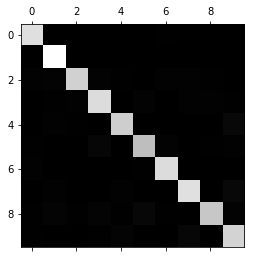

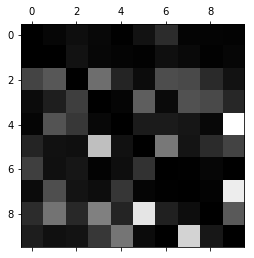

In [33]:
# Plotting the image of Confusion Matrix
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_matrix / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [34]:
# Prediction with test data
y_KNN_pred = KNN_clf.predict(X_test)

In [35]:
# Finding accuracy with test data
accuracy_score(y_test, y_KNN_pred)


0.96840000000000004